# Cubical Ripser 2D : Calculation of Persitent Homology of 2D Cubical Toplexes 

Here we explore one of the various PH algorithms that are integrated into the TDA toolkit.  These include;

- Cubical RIPSER; https://github.com/CubicalRipser



In [1]:
#  Import the Cube2D module
import Cube2D

#  Here are the available classes and methods in TDA:
dir(Cube2D)

['Axes3D',
 'CubicalRipser2D',
 'Filter2D',
 'PCA',
 'Pool',
 'TimeoutError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compute_2DPHD',
 'compute_2DPHD_from_file',
 'convert_binary_cells_to_point_cloud',
 'convert_csv_to_dipha',
 'csv',
 'display',
 'getSlidingWindowVideo',
 'gridspec',
 'interp',
 'np',
 'os',
 'pd',
 'plot_barcode_diagram',
 'plot_barcode_diagram_from_file',
 'plot_persistence_diagram',
 'plot_persistence_diagram_from_file',
 'plt',
 'save_array_to_dipha',
 'save_binary_cells_to_point_cloud',
 'sliding_window',
 'slinding_window_conv',
 'struct',
 'time',
 'warnings',
 'widgets']

There are currently 4 Persistent Homology classes in the standard TDA Toolkit; CubicalRipser2D, CubicalRipser3D, Perseus and Ripser.  Each of them have a default constructor, destructor and a ComputeBarcode() method:

In [2]:
dir(Cube2D.CubicalRipser2D)

['ComputeBarcode',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'getBarcode']

# Cubical Ripser 2D

Let's examine each of the possible constructors.  First, the most verbose constructor takes the following function arguments;

**CubicalRipser2D::ComputeBarcode(string input_file, string output_file, string format, double threshold, bool print)**

Where the input file is either DIPHA or PERSEUS formatted file with the 2D persistence image condensed into a single vector.  The Print option will print the results to the screen, and threshold determines the maximum value to run persistence to.


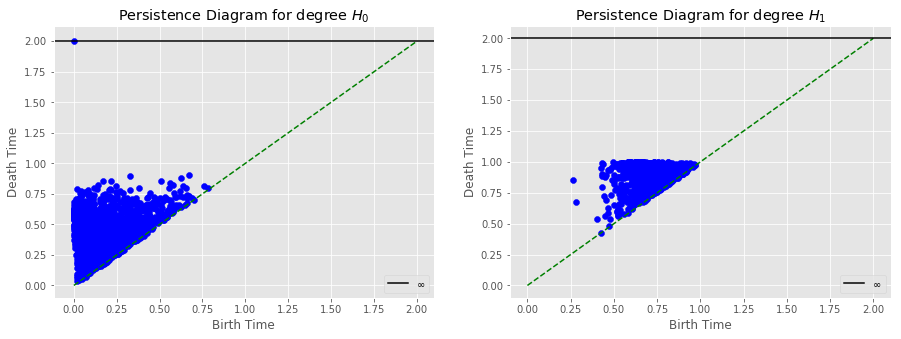

In [2]:
from Cube2D import CubicalRipser2D
#  Create a CubicalRipser2D object
cube2D = CubicalRipser2D()

#  Try one of the examples in the dat/ folder
cube2D.ComputeBarcode("algorithms/CubicalRipser_2dim/dat/test_2_100.complex", "test.csv", "DIPHA", 100, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode, threshold=100)

We can also plot a barcode diagram

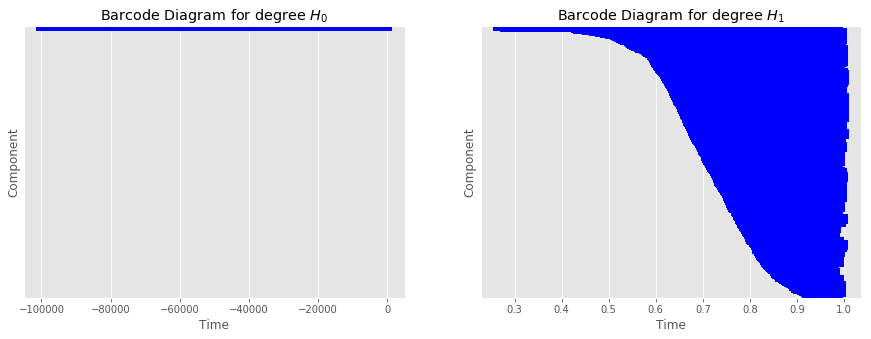

In [6]:
Cube2D.plot_barcode_diagram(barcode)

To compute the Persistent Homology Dimension, we simply call

[-6.90103466  1.92973791]


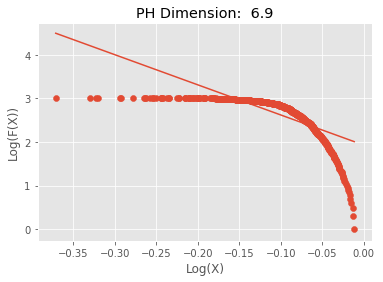

In [3]:
Cube2D.compute_2DPHD(barcode)

Let's try to see if CubicalRipser2D can find the Homology of a circle S^1

Saved array to DIPHA format file examples/grid_test.csv



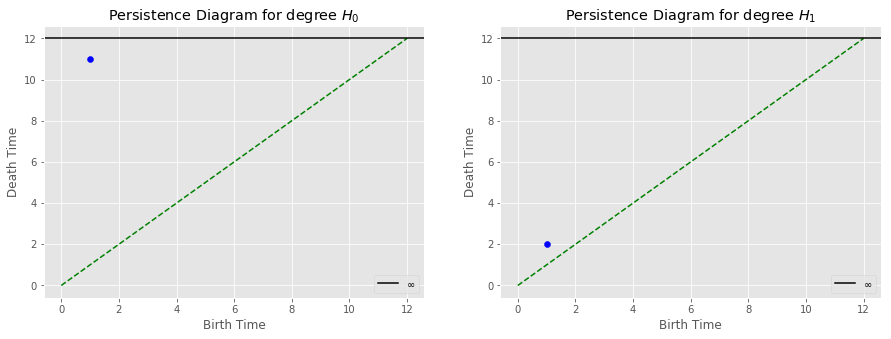

In [4]:
# Create 3x3 2D pixel array
grid = [[1,1,1],[1,2,1],[1,1,1]]

# save as dipha format
Cube2D.save_array_to_dipha(grid, "examples/grid_test.csv")

#  Compute the barcode
cube2D.ComputeBarcode("examples/grid_test.csv", "examples/test.csv", "DIPHA", 10, True)

#  Plot the persistence diagram
Cube2D.plot_persistence_diagram_from_file("examples/test.csv")

Or together

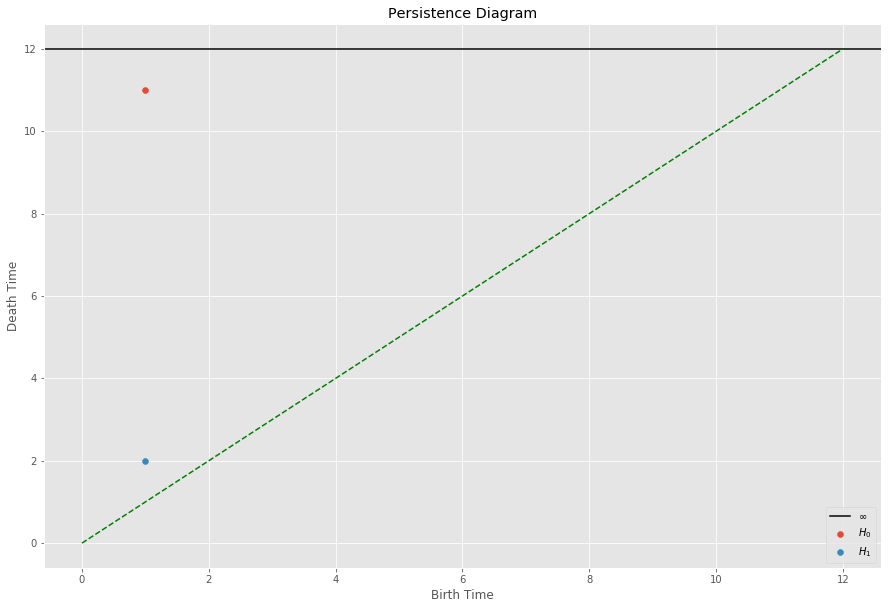

In [5]:
Cube2D.plot_persistence_diagram_from_file("examples/test.csv", split=False)

And the corresponding barcode

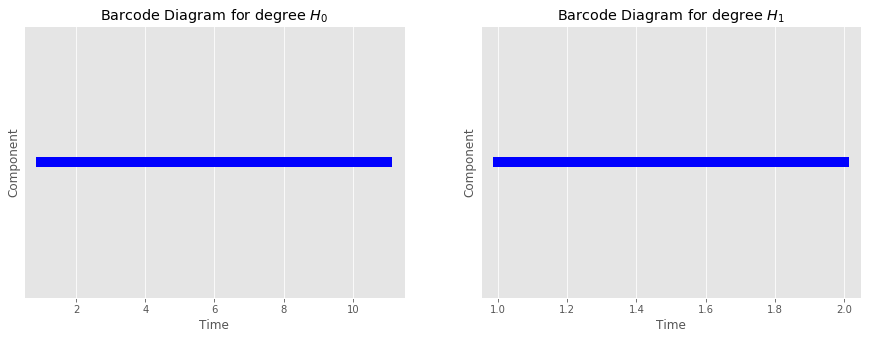

In [6]:
Cube2D.plot_barcode_diagram_from_file("examples/test.csv")

And of course the Persistent Homology Dimension

[-0.  0.]


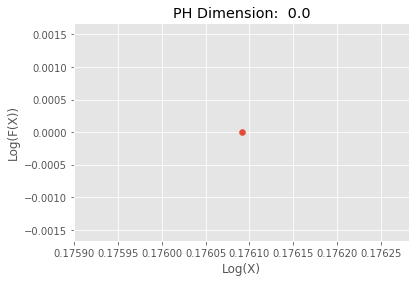

In [7]:
Cube2D.compute_2DPHD_from_file("examples/test.csv")

# Filters

There are various filter functions available for binary cell data.  The von Neumann filter simulates the L1 "taxi-cab" filter by looking at the up,down,left and right cells in the image and updating them according to the current time step.  To see how this works, consider the following example;

Converted examples/square_L1.csv to DIPHA format file examples/square_dipha.csv



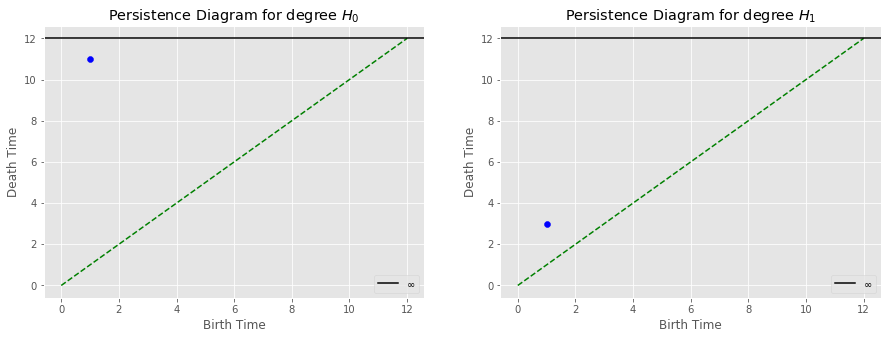

In [8]:
import csv
from Cube2D import Filter2D
#    create a 5x5 grid with the homology of S^1
grid = [[1,1,1,1,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,1,1,1,1]]

#    write this data to file
with open("examples/square.csv", 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(grid)
    
#   try 2D L1 filter
filt = Filter2D()
filt.loadBinaryFromFile("examples/square.csv")
filt.filterBinaryL1(10)
filt.saveBinaryFiltration("examples/square_L1.csv")

#    create CubicalRipser2D object
cube2D = CubicalRipser2D()

#    convert the filtration to DIPHA format
Cube2D.convert_csv_to_dipha("examples/square_L1.csv", "examples/square_dipha.csv")

#    compute the barcode and plot the persistence diagram
cube2D.ComputeBarcode("examples/square_dipha.csv", "test.csv", "DIPHA", 10, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)

Another type of filter is the Linf filter which looks at not just the up,down,left and right neighbors, but also the diagonal.  This is kind of a "Moore-neighborhood" filter, rather than the L1 filter in the previous example.  To see how this works, consider;

Converted examples/square_Linf.csv to DIPHA format file examples/square_dipha.csv



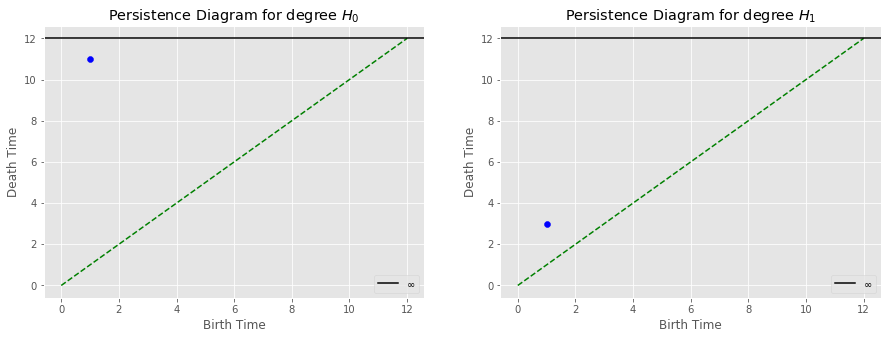

In [9]:
#   try 2D Moore filter
filt = Filter2D()
filt.loadBinaryFromFile("examples/square.csv")
filt.filterBinaryLinf(10)
filt.saveBinaryFiltration("examples/square_Linf.csv")

#    create CubicalRipser2D object
cube2D = CubicalRipser2D()

#    convert the filtration to DIPHA format
Cube2D.convert_csv_to_dipha("examples/square_Linf.csv", "examples/square_dipha.csv")

#    compute the barcode and plot the persistence diagram
cube2D.ComputeBarcode("examples/square_dipha.csv", "test.csv", "DIPHA", 10, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)

In this example of course it does not make much of a difference, but it will in general shift the PH points down.  Finally there is an L2 filter available which simulates a growing balls persistence filter.

Converted examples/square_L2.csv to DIPHA format file examples/square_dipha.csv



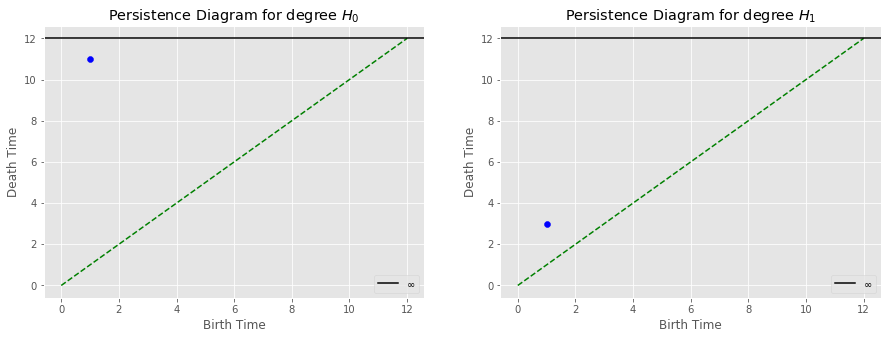

In [10]:
#   try 2D Moore filter
filt = Filter2D()
filt.loadBinaryFromFile("examples/square.csv")
filt.filterBinaryL2(10)
filt.saveBinaryFiltration("examples/square_L2.csv")

#    create CubicalRipser2D object
cube2D = CubicalRipser2D()

#    convert the filtration to DIPHA format
Cube2D.convert_csv_to_dipha("examples/square_L2.csv", "examples/square_dipha.csv")

#    compute the barcode and plot the persistence diagram
cube2D.ComputeBarcode("examples/square_dipha.csv", "test.csv", "DIPHA", 10, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)